<a href="https://colab.research.google.com/github/dineshkk15/hello-world/blob/main/Python_advance/19_Exercise_Skill_Pay_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise - Investigate High Paying Skills

## Topics Covered

This exercise goes over:

* Plotting
* Customization

## Question

In our project we want to analyze salary data. Here's what we'll be focusing on:
* Visualize for highest paying skills
* Visualize for highest demanded skills

Load the data.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [ ]:
df_da_india = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'India')].copy()

df_da_india = df_da_india.dropna(subset=['salary_year_avg'])

In [ ]:
df_da_india =df_da_india.explode('job_skills')
df_da_india[['salary_year_avg', 'job_skills']]

,salary_year_avg,job_skills
11412,50400.0,python
11412,50400.0,sql
11412,50400.0,aws
11412,50400.0,azure
11412,50400.0,excel
...,...,...
777313,111202.0,looker
777313,111202.0,powerpoint
784033,111175.0,power bi
784033,111175.0,tableau


In [ ]:
df_da_india_group = df_da_india.groupby('job_skills')['salary_year_avg'].agg(['median', 'count'])

In [ ]:
df_da_top_pay = df_da_india_group.sort_values(by='median', ascending=False).head(10)

df_da_top_pay

,median,count
job_skills,,
postgresql,165000.0,1
pyspark,165000.0,1
gitlab,165000.0,1
linux,165000.0,1
mysql,165000.0,1
gdpr,163782.0,2
mongodb,163782.0,6
scala,163782.0,3
neo4j,163782.0,1


In [ ]:
df_da_skills = df_da_india_group.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False)
df_da_skills

,median,count
job_skills,,
power bi,111175.0,17
spark,111175.0,11
tableau,108087.5,20
excel,98500.0,39
sql,96050.0,46
python,96050.0,36
azure,93600.0,15
r,79200.0,18
aws,79200.0,12


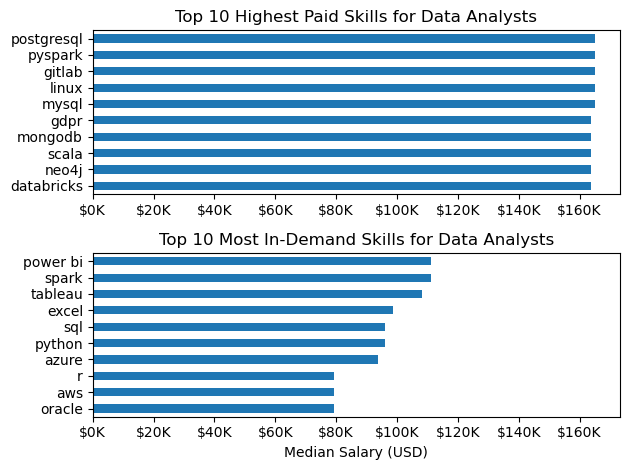

In [ ]:
fig, ax = plt.subplots(2, 1)

df_da_top_pay.plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].invert_yaxis()
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
df_da_skills.plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].invert_yaxis()
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()


In [ ]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [ ]:
# Only get data analyst jobs in the US
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

### Visualize for highest paying skills

1. Explode out the skills column.

In [ ]:
df_DA_US = df_DA_US.explode('job_skills')

df_DA_US[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
288,150000.0,nosql
288,150000.0,sql
288,150000.0,vba
288,150000.0,oracle
288,150000.0,hadoop


2. Get the highest paying skills (order by highest to lowest).

In [ ]:
df_DA_top_pay = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)

df_DA_top_pay = df_DA_top_pay.head(10)

df_DA_top_pay

,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


3. Match up the highest count (demand) of skills and highest median salary by skill for data analyst roles.

In [ ]:
df_DA_skills = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.head(10).sort_values(by='median', ascending=False)

df_DA_skills

,count,median
job_skills,,
python,1438,97500.0
tableau,1368,92500.0
sql server,291,92500.0
r,895,90490.0
sql,2522,90300.0
sas,928,90000.0
power bi,841,90000.0
powerpoint,465,85000.0
excel,1815,84500.0


### Plot

5. Let's plot these next to each other using `subplots()`.

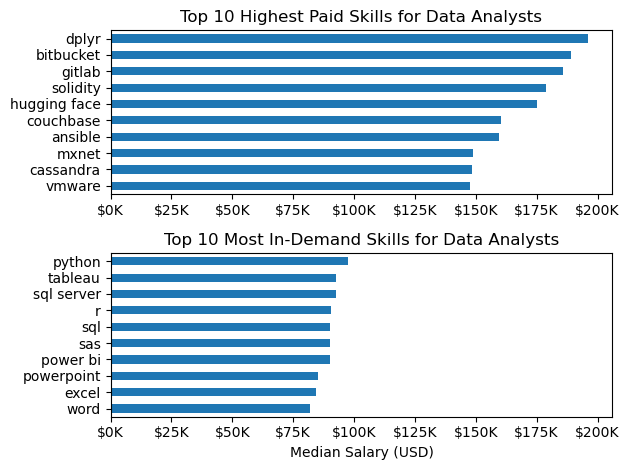

In [ ]:
fig, ax = plt.subplots(2, 1)

# Top 10 Highest Paid Skills for Data Analysts
df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


# Top 10 Most In-Demand Skills for Data Analysts
df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()